# BoomBikes - Bike sharing system

Problem Statement: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due. It has decided to come up with a mindful business plan to be able to accelerate its revenue. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

- cnt is the target variable

# 1. Prerequisite

1. Import necessary libraries
2. Read csv file
3. Initial data check
    1. Data quality/null count check

In [1]:
import numpy as np
import pandas as pd #for pandas
# For plotting graph
import matplotlib.pylab as plt
import seaborn as sns
# For Linear regression, Statsmodel
import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load data
bike_data = pd.read_csv('data/day.csv')

#Check the data
print(bike_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
# initial data check
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- <font color="blue">Summary:</font>
    - <font color="blue">Data looks good - total 730 records, and all the columns having data.</font>
    - <font color="blue">Data type looks good.</font>
    - <font color="blue">Convert dteday column to day. (Month and Year already there as seperate columns)</font>

# 2 - Data cleaning

1. Create new column day derived from dteday
2. Remove the unwanted columns: dteday, instant
3. Check for duplicate raws, missing values, unique counts
4. Check for outliers

In [4]:
# Convert date to day
bike_data['day'] = pd.to_datetime(bike_data['dteday'],  format='%d-%m-%Y').dt.day

In [5]:
# Remove the columns
bike_data = bike_data.drop(['dteday', 'instant', 'registered', 'casual'], axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


Check for Duplicate raws, Missing Values, Unique values

In [6]:
# Checking for duplicate rows
display(bike_data[bike_data.duplicated()].shape)
# No duplicate raws.

(0, 13)

In [7]:
display(bike_data.nunique())
#From output - yr column having only 2 values, but it is relevant

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
day            31
dtype: int64

Checking for outliers

In [8]:
bike_data.shape

(730, 13)

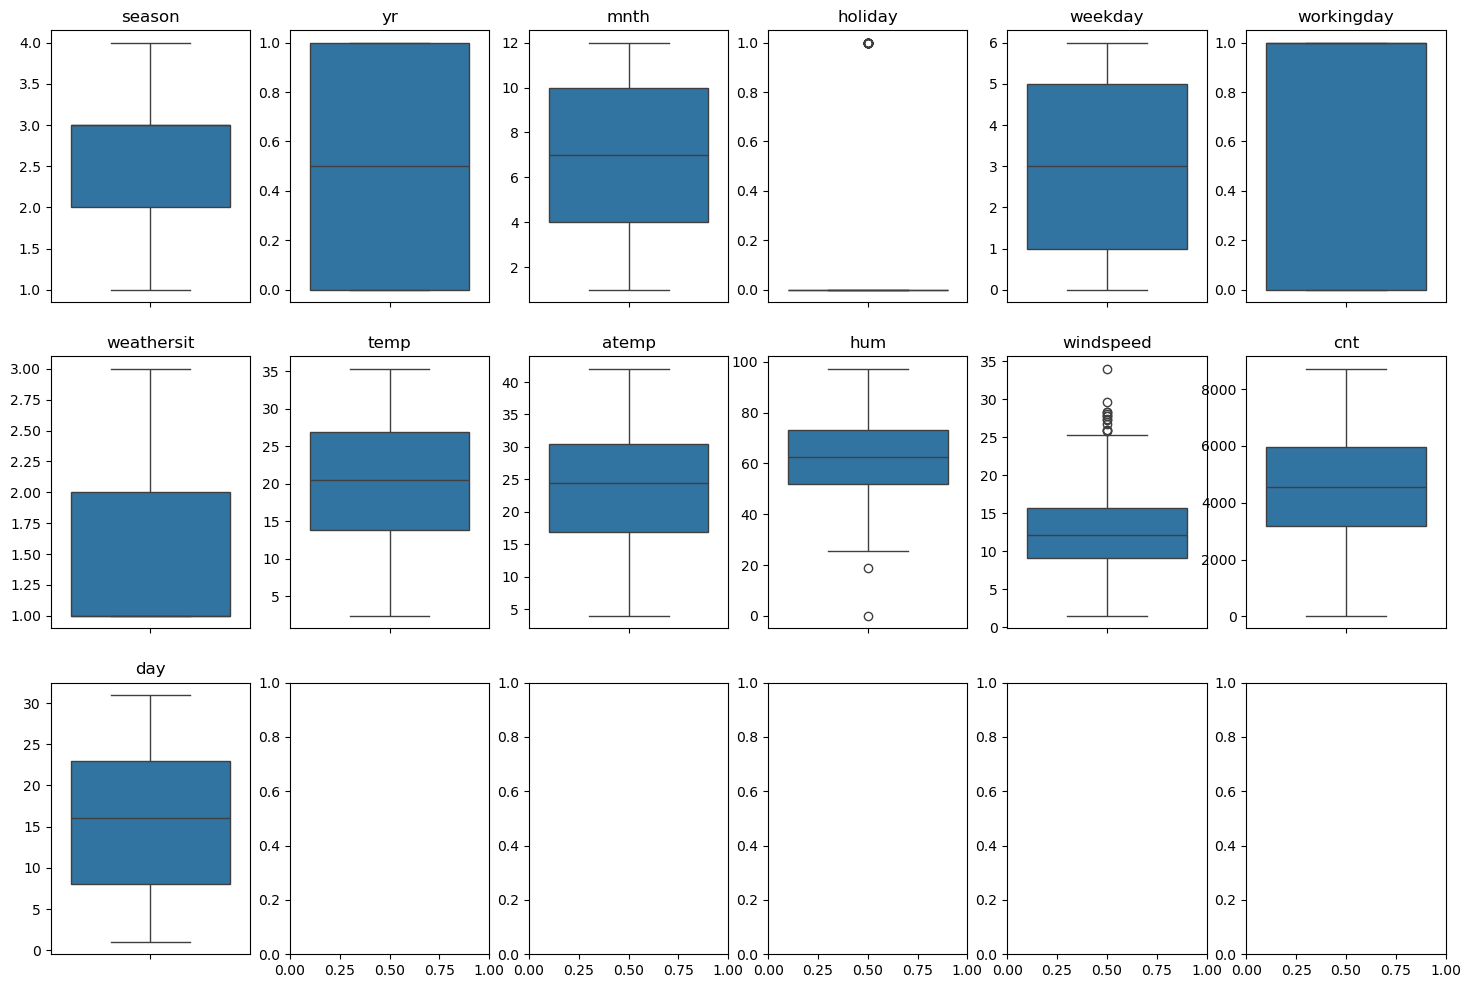

In [9]:
ncols=6
nrows=round(16/ncols)
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 12))
ax = ax.flatten()
for index, column in enumerate(bike_data.columns):
    sns.boxplot(data=(bike_data[column]), ax=ax[index])
    ax[index].set_title(column)
    ax[index].set_ylabel(None)
plt.show()

<font color="blue">Summary:</font>
   1. <font color="blue">There are no duplicate rows</font>
   2. <font color="blue">There are no missing values (from info method)</font>
   3. <font color="blue">There are lot of categorical values, so need to convert it as dummy values. So columns are not removing now</font>
   4. <font color="blue">Data is good, no outliers</font>


## 2.1 Data Mapping

In [10]:
# Mapping colum values for better interpretation
bike_data.season = bike_data.season.map({1:'1-spring', 2:'2-summer', 3:'3-fall', 4:'4-winter'})
bike_data.mnth = bike_data.mnth.map({1:'1-jan',2:'2-feb',3:'3-mar',4:'4-apr',
                                     5:'5-may',6:'6-june',7:'7-july',8:'8-aug',
                                     9:'9-sep',10:'10-oct',
                                     11:'11-nov',12:'12-dec'})
bike_data.weekday = bike_data.weekday.map({0:'0-sun',1:'1-mon',2:'2-tue',
                                           3:'3-wed',4:'4-thu',
                                           5:'5-fri',6:'6-sat'})
bike_data.weathersit = bike_data.weathersit.map({1:'1-clear',
                                                 2:'2-misty',
                                                 3:'3-snow',
                                                 4:'4-heavyrain'})
print(bike_data)

       season  yr    mnth  holiday weekday  workingday weathersit       temp  \
0    1-spring   0   1-jan        0   6-sat           0    2-misty  14.110847   
1    1-spring   0   1-jan        0   0-sun           0    2-misty  14.902598   
2    1-spring   0   1-jan        0   1-mon           1    1-clear   8.050924   
3    1-spring   0   1-jan        0   2-tue           1    1-clear   8.200000   
4    1-spring   0   1-jan        0   3-wed           1    1-clear   9.305237   
..        ...  ..     ...      ...     ...         ...        ...        ...   
725  1-spring   1  12-dec        0   4-thu           1    2-misty  10.420847   
726  1-spring   1  12-dec        0   5-fri           1    2-misty  10.386653   
727  1-spring   1  12-dec        0   6-sat           0    2-misty  10.386653   
728  1-spring   1  12-dec        0   0-sun           0    1-clear  10.489153   
729  1-spring   1  12-dec        0   1-mon           1    2-misty   8.849153   

        atemp      hum  windspeed   cnt

# 3. Visualisation

Split columns into numerical and categorical

In [11]:
numeric_columns = bike_data.select_dtypes(include=['number']).columns.tolist()
# Get categorical columns
categorical_columns = bike_data.columns[~bike_data.columns.isin(numeric_columns)].tolist()
display(numeric_columns)
display(categorical_columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'day']

['season', 'mnth', 'weekday', 'weathersit']

## 3.1 Univariate Analysis

Categorical Variables

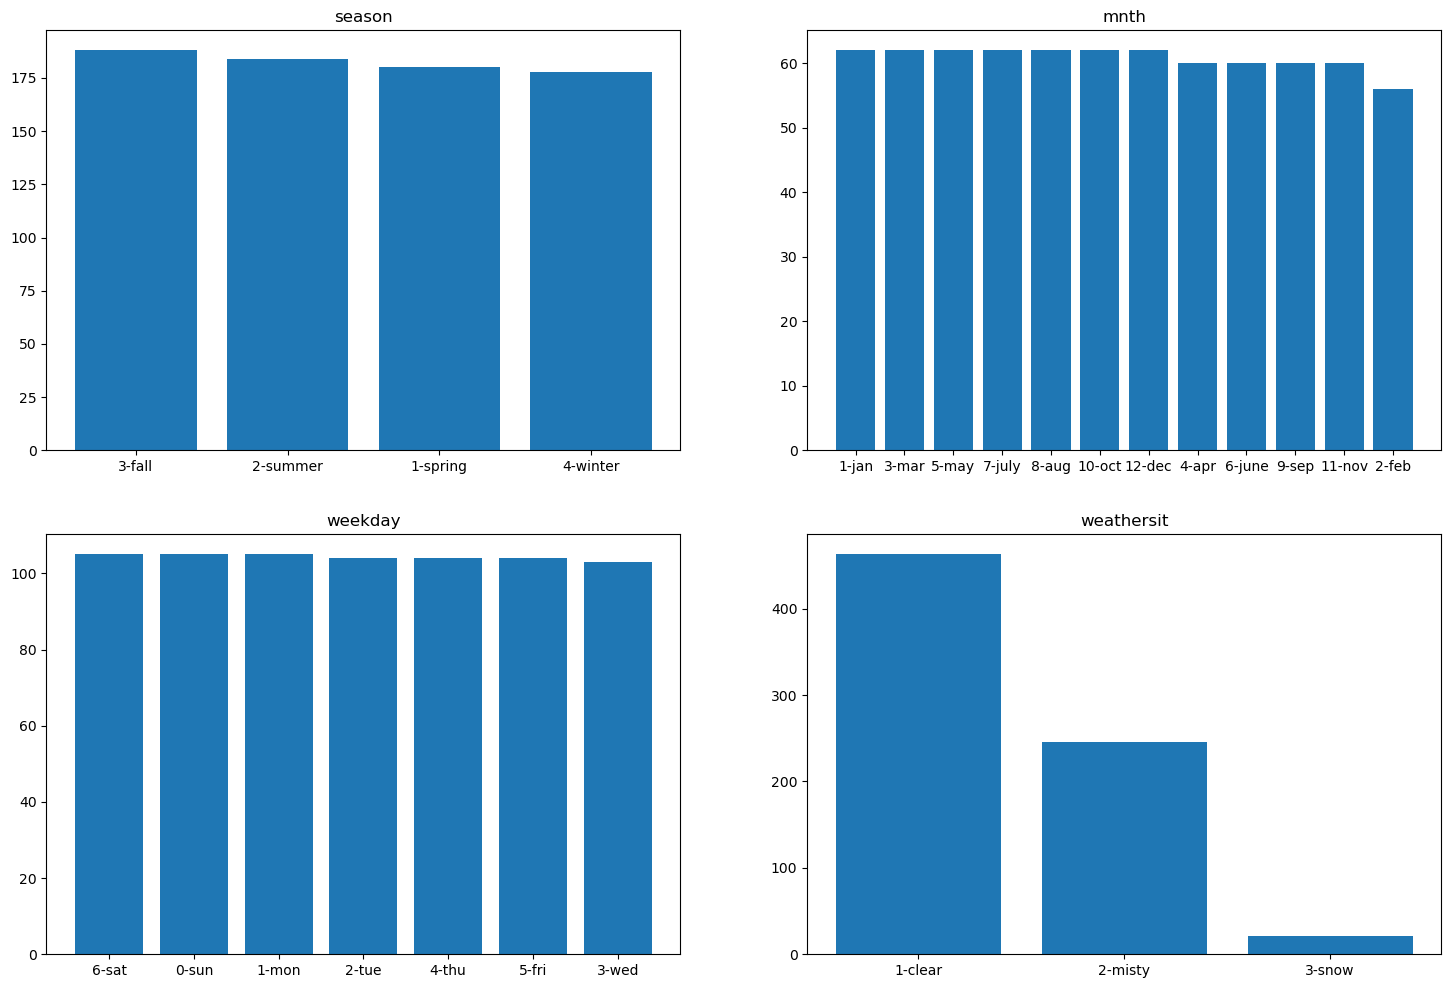

In [12]:
columns_to_plot=pd.Series(categorical_columns)
columns_to_plot = columns_to_plot[~columns_to_plot.isin(
    ['cnt'])]
ncols=2
nrows=2
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 12))
ax = ax.flatten()
for index, column in enumerate(columns_to_plot):
    df = bike_data[column].value_counts()
    ax[index].bar(df.index, df.values)
    ax[index].set_title(column)
plt.show()

For Numerical Variables

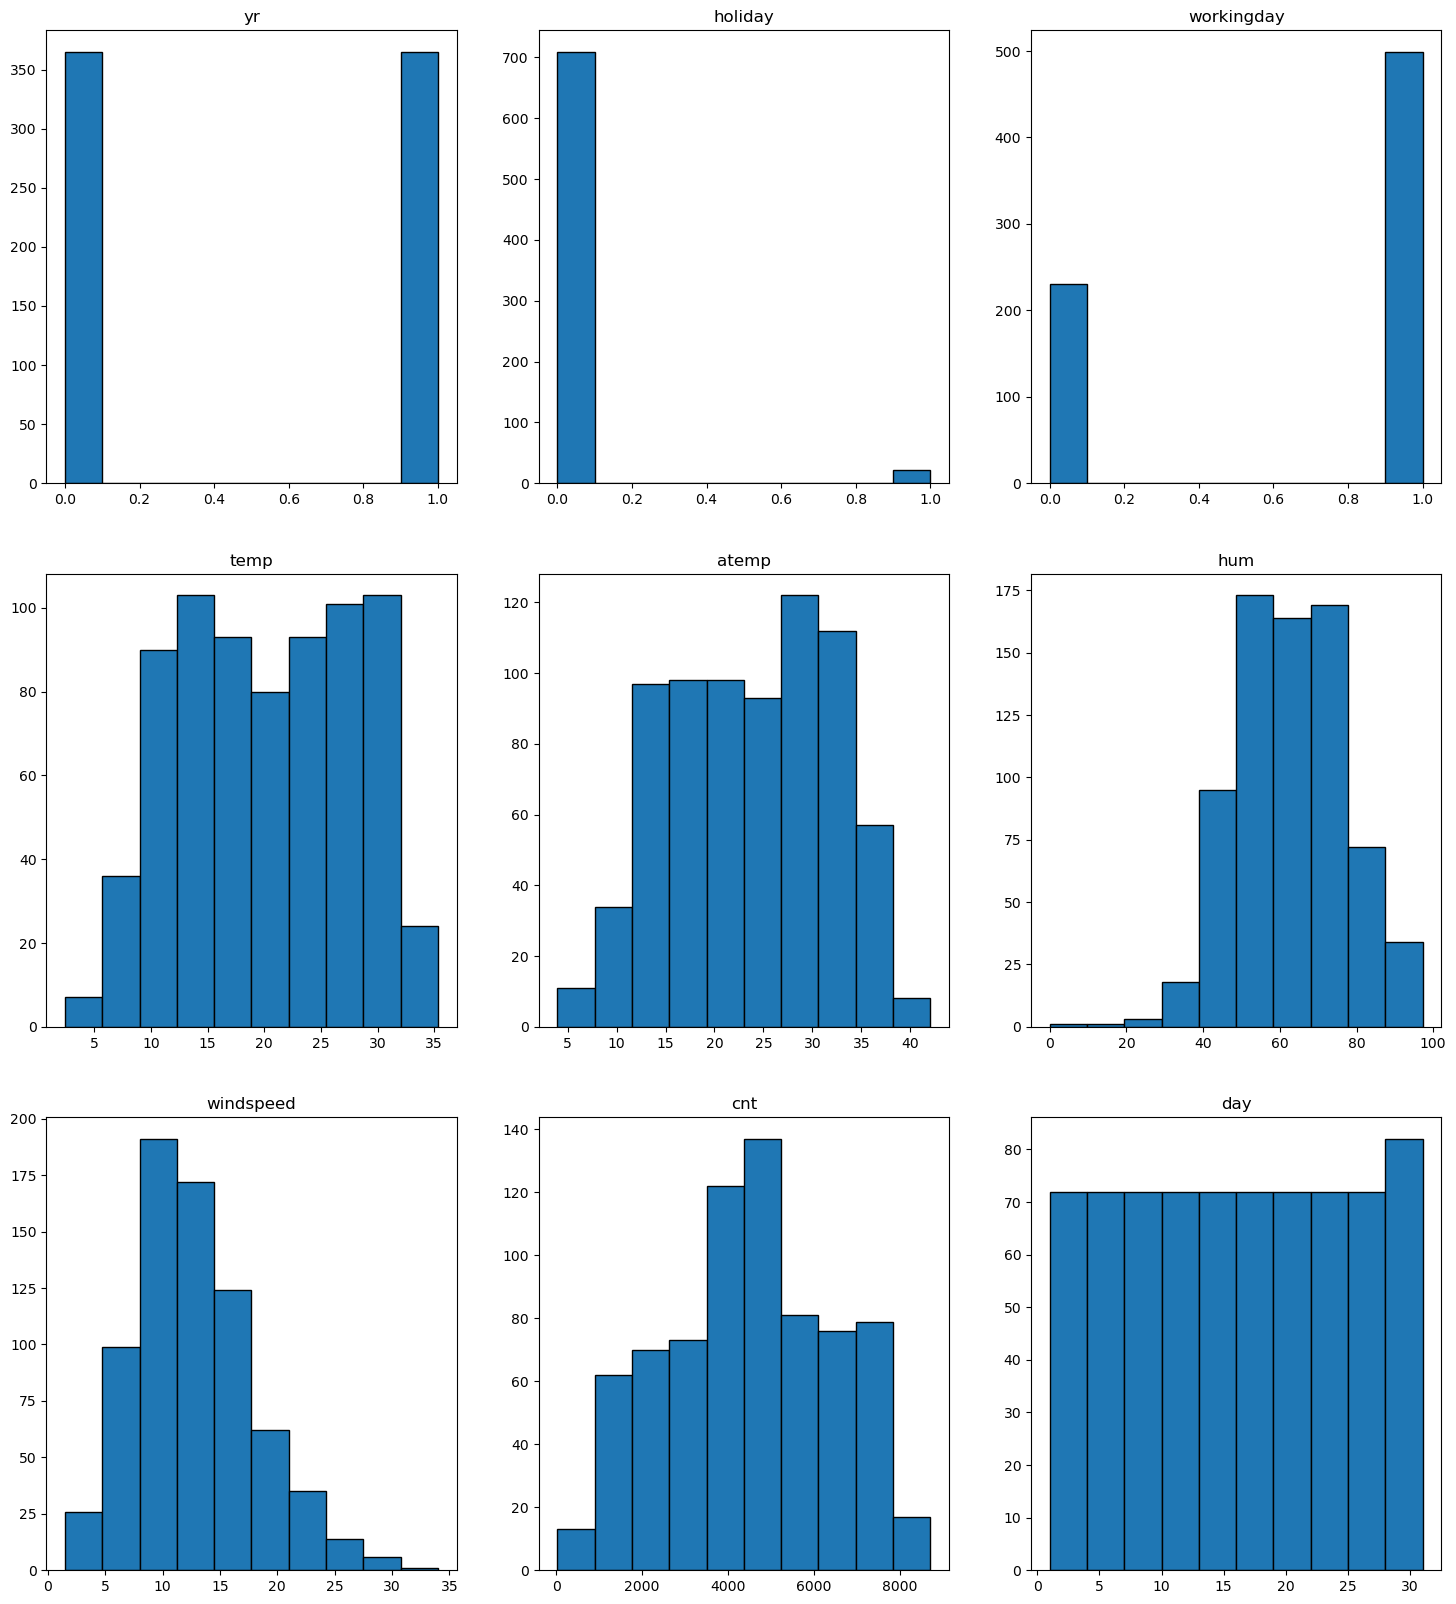

In [13]:
ncols=3
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 20))
ax = ax.flatten()
for index, column in enumerate(numeric_columns):
    ax[index].hist(x=bike_data[column], edgecolor='black')
    ax[index].set_title(column)
plt.show()

<font color="blue">Summary: There are more users using bike sharing</font>
   1. <font color="blue">There are more users using bike sharing when the weather is clear, or partly cloudy</font>
   2. <font color="blue">Bike sharing usage increases when the wind speed is between 8 and 15</font>
   3. <font color="blue">Bike sharing is more popular on working days (not holidays)</font>
   4. <font color="blue">Bike sharing usage is higher when the temperature is between 10°C and 30°C</font>
   5. <font color="blue">There are more bike-sharing users when the humidity is between 50% and 80%</font>


## 3.2 Bivariate Analysis

Comparing numerical variable vs count

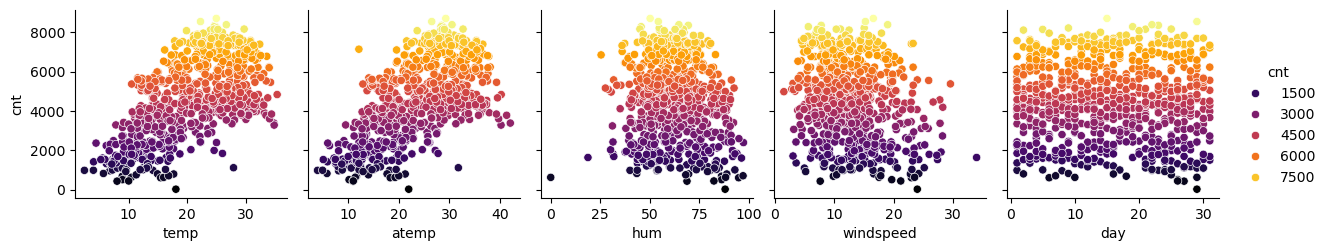

In [14]:
# creating a pairplot between the numerical variables
columns_to_plot = [col for col in numeric_columns if col not in ['yr', 'cnt', 'holiday','workingday']]
sns.pairplot(data=bike_data,x_vars=columns_to_plot,y_vars='cnt',  hue = 'cnt', palette = 'inferno')
plt.show()


Numerical vs Categorical

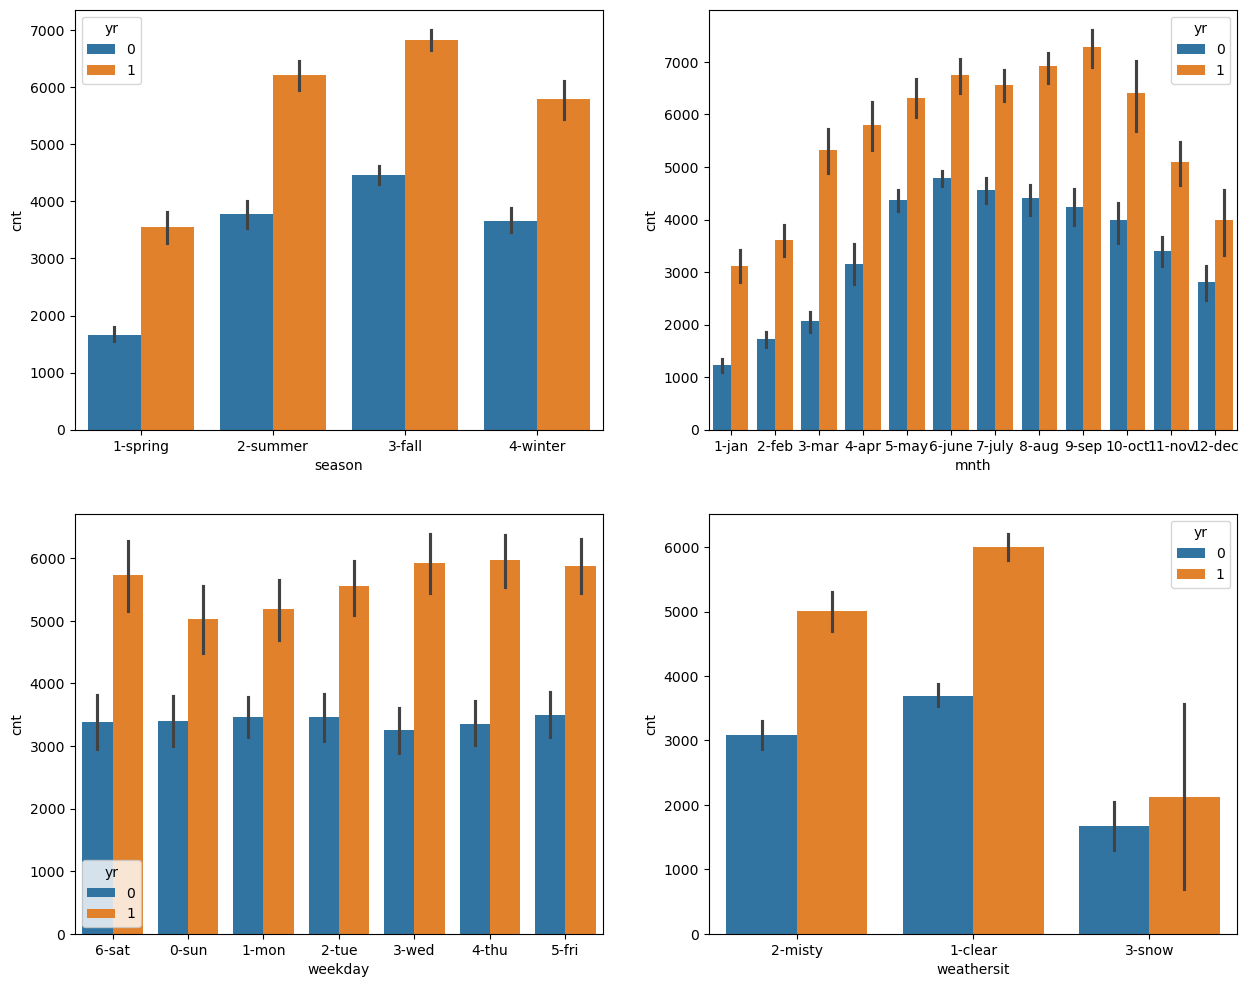

In [15]:
# plotting bar chart between categorical and cnt with hue yr
ncols=2
nrows=2
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(15, 12))
ax = ax.flatten()
for index, column in enumerate(categorical_columns):
    sns.barplot(data=bike_data,x=column,y='cnt',hue='yr', ax=ax[index])

<font color="blue">Summary:</font>
   1. <font color="blue">Users tend to use bike sharing more during the fall season, while the spring season sees the least usage.</font>
   2. <font color="blue">Most bookings occur between May and September.</font>
   3. <font color="blue">The year 2019 saw a higher number of bike usage compared to the previous year.</font>
   4. <font color="blue">The 'temp' and 'atemp' variables show the highest correlation with the target variable (cnt).</font>

## 3.3 Multi variate Analysis

Heatmap to understand the correlation

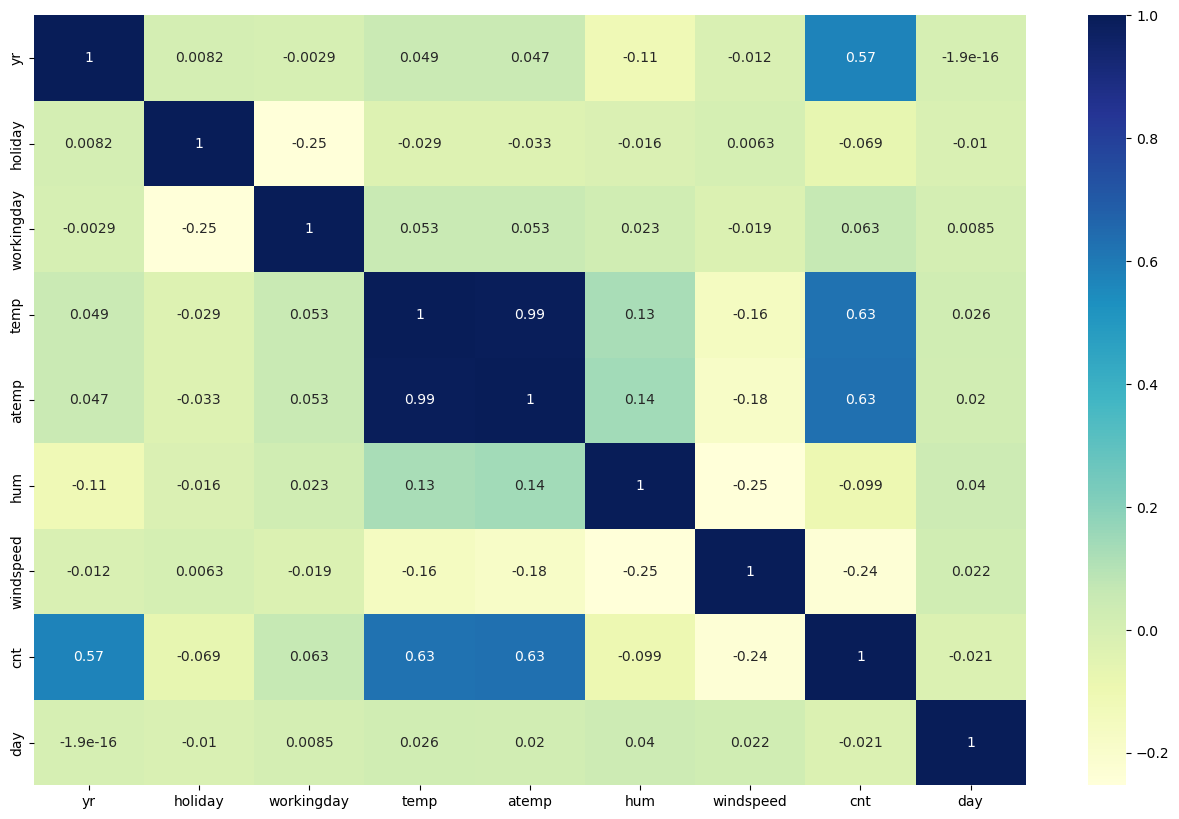

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data[numeric_columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

<font color="blue">Summary: 'temp' and 'atemp' is highly correlated. So just need either one of them.</font>


# 4. Prerequisite for modeling

## 4.1 Insights

<font color="blue">There are linearity between target variable(count) and independent variables (humidity, windspeed, temp, atemp, month, year). So we can proceed with linear regression (from graph in viz section)</font>

<font color="blue">Here count (cnt) is the dependent variable.</font>

## 4.2 Data preparation for modeling

In [17]:
bike_data = bike_data.drop('day', axis=1)

### 4.2.1 Binary variables

All binary variables - yr, holiday, workingday are already in 0s and 1s, so we are good here

### 4.2.2 Dummy variables 

1. Create dummy variables for season

In [18]:
dummies = pd.get_dummies(bike_data['season'], drop_first = True, dtype=int)
print(dummies.head())
# add the new columns to original Data frame
bike_data = pd.concat([bike_data, dummies], axis = 1)

   2-summer  3-fall  4-winter
0         0       0         0
1         0       0         0
2         0       0         0
3         0       0         0
4         0       0         0


2. Create dummy variables for weathersit

In [19]:
dummies = pd.get_dummies(bike_data['weathersit'], drop_first = True, dtype=int)
display(dummies.head())
bike_data = pd.concat([bike_data, dummies], axis = 1)

,2-misty,3-snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


3. Create dummy variables for weekday

In [20]:
dummies = pd.get_dummies(bike_data['weekday'], drop_first = True, dtype=int)
display(dummies.head())
bike_data = pd.concat([bike_data, dummies], axis = 1)

,1-mon,2-tue,3-wed,4-thu,5-fri,6-sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


4. Create dummy variable for month

In [21]:
dummies = pd.get_dummies(bike_data['mnth'], drop_first = True, dtype=int)
display(dummies.head())
bike_data = pd.concat([bike_data, dummies], axis = 1)

,10-oct,11-nov,12-dec,2-feb,3-mar,4-apr,5-may,6-june,7-july,8-aug,9-sep
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


5. Create dummy variables for year

In [22]:
# Drop the columns
bike_data = bike_data.drop(['weathersit','season','weekday','mnth'], axis=1)

In [23]:
print(bike_data.head())

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   2-summer  3-fall  ...  11-nov  12-dec  2-feb  3-mar  4-apr  5-may  6-june  \
0         0       0  ...       0       0      0      0      0      0       0   
1         0       0  ...       0       0      0      0      0      0       0   
2         0       0  ...       0       0      0      0      0      0       0   
3         0       0  ...       0       0      0      0      0      0       0   
4         0       0  ...       0       0      0      0      0      0       0   

   7-july  8-aug  9-sep  
0       0      0      0  
1   

### 4.2.3 Split Train-Test

In [24]:
# 70% train data, 30% test data
bike_data_train, bike_data_test = train_test_split(bike_data,
                                                   train_size = 0.7, 
                                                   test_size = 0.3, 
                                                   random_state = 100)
display(bike_data_train.shape)
display(bike_data_test.shape)

(510, 30)

(219, 30)

### 4.2.4 Scaling data

In [25]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [26]:
#Validating
print(bike_data_train.describe())

               yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    2-summer      3-fall  ...      11-nov  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.086275   
std      0.169797    0.224593    0.430568    0.4

## 4.3 Understand the correlation

Plot heatmap - Understand the highly correlated variables with dependent variable

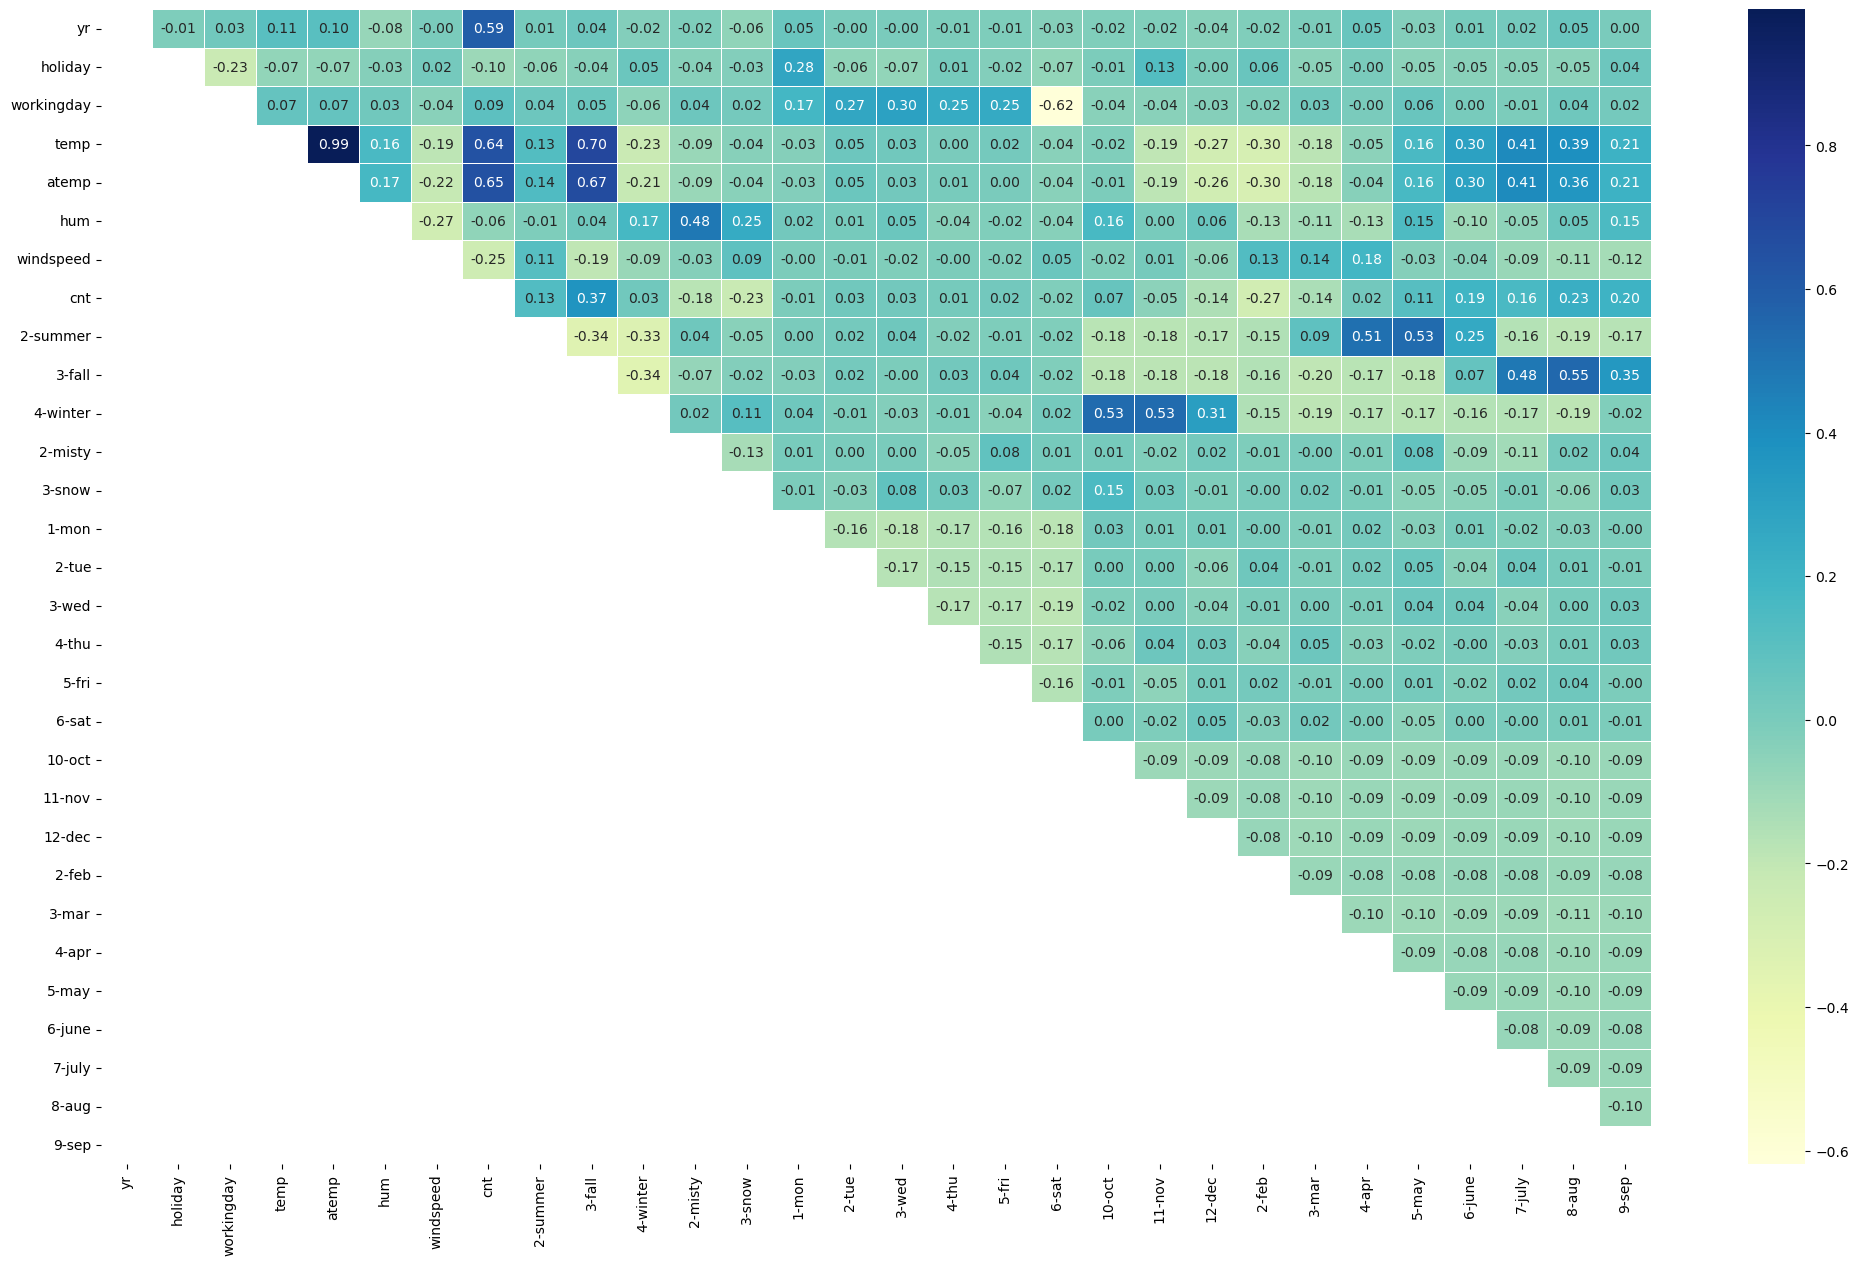

In [27]:
plt.figure(figsize=(25,15))
corr = bike_data_train.corr()
# Create a mask for the lower triangle (to display only the upper half)
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot = True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
plt.show()

<font color="blue">Summary:</font>
- <font color="blue">Highly correlated predictors</font>
    - <font color="blue">tem, atem</font>
    - <font color="blue">fall - temp, atem</font>
    - <font color="blue">Months april and may</font>
    - <font color="blue">Working day with week days</font>

# 5. Train the model (Using Train data)

## 5.1 Prepare X and y

Define X (predictors) and y (output)

In [28]:
y_train = bike_data_train.pop('cnt') #cnt target variable
X_train = bike_data_train #all remain independent variable

## 5.2. Selecting Features using RFE 

Using RFE to select the features (independent variables)

In [29]:
X_train.shape

(510, 29)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X=X_train, y=y_train)

In [32]:
#To get the RFE rankings
display(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
#display the columns selected by RFE
display(col)

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2-summer', True, 1),
 ('3-fall', True, 1),
 ('4-winter', True, 1),
 ('2-misty', True, 1),
 ('3-snow', True, 1),
 ('1-mon', False, 11),
 ('2-tue', False, 12),
 ('3-wed', False, 14),
 ('4-thu', False, 15),
 ('5-fri', False, 13),
 ('6-sat', True, 1),
 ('10-oct', True, 1),
 ('11-nov', False, 9),
 ('12-dec', False, 10),
 ('2-feb', False, 7),
 ('3-mar', False, 2),
 ('4-apr', False, 4),
 ('5-may', False, 3),
 ('6-june', False, 5),
 ('7-july', False, 8),
 ('8-aug', True, 1),
 ('9-sep', True, 1)]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '2-summer',
       '3-fall', '4-winter', '2-misty', '3-snow', '6-sat', '10-oct', '8-aug',
       '9-sep'],
      dtype='object')

In [33]:
#Taking RFE provided columns to learn the model
X_train_by_RFE = X_train[col]

## 5.3 Common Methods

In [34]:
# Build the model using stats mode
def build_model(X, y):
    X_sm = sm.add_constant(X)
    lm = sm.OLS(y, X_sm).fit()
    return lm

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
# Both- Build model and check RFE
def build_model_and_check(X, y):
    lm = build_model(X, y)
    vif = check_VIF(X)
    display(lm.summary())
    display(vif)
    return lm

## 5.4 Building the model using statsmodel

### 5.4.1 Checking initial LM values

In [37]:
print(X_train_by_RFE.head())

     yr  holiday  workingday      temp       hum  windspeed  2-summer  3-fall  \
653   1        0           1  0.509887  0.575354   0.300794         0       0   
576   1        0           1  0.815169  0.725633   0.264686         0       1   
426   1        0           0  0.442393  0.640189   0.255342         0       0   
728   1        0           0  0.245101  0.498067   0.663106         0       0   
482   1        0           0  0.395666  0.504508   0.188475         1       0   

     4-winter  2-misty  3-snow  6-sat  10-oct  8-aug  9-sep  
653         1        0       0      0       1      0      0  
576         0        0       0      0       0      0      0  
426         0        1       0      1       0      0      0  
728         0        0       0      0       0      0      0  
482         0        1       0      1       0      0      0  


Checking the LM summary and VIF for all features selected by RFE

In [38]:
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.89e-191
Time:                        11:21:39   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1950      0.029      6.791      0.000       0.139       0.251
yr             0.2301      0.008     28.776      0.000       0.214       0.246
holiday       -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday     0.0446      0.012      3.877      0.000       0.022       0.067
temp           0.4960      0.034     14.803      0.000       0.430       0.562
hum           -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed     -0.1824      0.025     -7.200      0.000      -0.232      -0.133
2-summer       0.1175      0.015      7.985      0.000       0.089       0.146
3-fall         0.0295      0.022      1.346      0.179      -0.014       0.073
4-winter       0.1430      0.013     10.688      0.000       0.117       0.169
2-misty       -0.0592      0.010     -5.702      0.000      -0.080      -0.039
3-snow        -0.2523      0.026     -9.655      0.000      -0.304      -0.201
6-sat          0.0533      0.015      3.676      0.000       0.025       0.082
10-oct         0.0442      0.017      2.565      0.011       0.010       0.078
8-aug          0.0475      0.017      2.745      0.006       0.013       0.081
9-sep          0.1178      0.017      6.895      0.000       0.084       0.151
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,temp,24.06
4,hum,17.47
7,3-fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,2-summer,3.44
8,4-winter,2.88
9,2-misty,2.15
0,yr,2.04
11,6-sat,1.90


### 5.4.2 Removing Features (one at a time)

#### 1. fall feature having high p value and high vif, so removing it.

In [39]:
X_train_by_RFE = X_train_by_RFE.drop('3-fall', axis=1)
#Building the model again
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.24e-192
Time:                        11:21:39   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.000       0.138       0.251
yr             0.2292      0.008     28.743      0.000       0.213       0.245
holiday       -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday     0.0444      0.012      3.850      0.000       0.022       0.067
temp           0.5301      0.022     24.136      0.000       0.487       0.573
hum           -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed     -0.1857      0.025     -7.359      0.000      -0.235      -0.136
2-summer       0.1039      0.011      9.680      0.000       0.083       0.125
4-winter       0.1348      0.012     11.316      0.000       0.111       0.158
2-misty       -0.0582      0.010     -5.618      0.000      -0.079      -0.038
3-snow        -0.2486      0.026     -9.559      0.000      -0.300      -0.197
6-sat          0.0529      0.015      3.647      0.000       0.024       0.081
10-oct         0.0411      0.017      2.403      0.017       0.007       0.075
8-aug          0.0560      0.016      3.478      0.001       0.024       0.088
9-sep          0.1255      0.016      7.783      0.000       0.094       0.157
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,4-winter,2.27
8,2-misty,2.14
0,yr,2.03
10,6-sat,1.90
6,2-summer,1.83
11,10-oct,1.62


#### 2. hum having highest VIF so removing it

In [40]:
X_train_by_RFE = X_train_by_RFE.drop('hum', axis=1)
#Building the model again
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.16e-189
Time:                        11:21:40   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.019      4.961      0.000       0.057       0.132
yr             0.2329      0.008     28.799      0.000       0.217       0.249
holiday       -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday     0.0475      0.012      4.045      0.000       0.024       0.070
temp           0.5099      0.022     23.236      0.000       0.467       0.553
windspeed     -0.1532      0.025     -6.203      0.000      -0.202      -0.105
2-summer       0.1008      0.011      9.226      0.000       0.079       0.122
4-winter       0.1267      0.012     10.544      0.000       0.103       0.150
2-misty       -0.0854      0.009     -9.839      0.000      -0.102      -0.068
3-snow        -0.2942      0.025    -12.009      0.000      -0.342      -0.246
6-sat          0.0580      0.015      3.931      0.000       0.029       0.087
10-oct         0.0371      0.017      2.132      0.033       0.003       0.071
8-aug          0.0542      0.016      3.305      0.001       0.022       0.086
9-sep          0.1189      0.016      7.259      0.000       0.087       0.151
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,4-winter,2.02
5,2-summer,1.82
9,6-sat,1.77
10,10-oct,1.62
11,8-aug,1.59
7,2-misty,1.54


#### 3. holiday having highest p value, so removing it

In [41]:
X_train_by_RFE = X_train_by_RFE.drop('holiday', axis=1)
#Building the model again
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.86e-189
Time:                        11:21:40   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0856      0.019      4.610      0.000       0.049       0.122
yr             0.2331      0.008     28.734      0.000       0.217       0.249
workingday     0.0555      0.011      5.031      0.000       0.034       0.077
temp           0.5116      0.022     23.259      0.000       0.468       0.555
windspeed     -0.1542      0.025     -6.226      0.000      -0.203      -0.106
2-summer       0.1015      0.011      9.269      0.000       0.080       0.123
4-winter       0.1260      0.012     10.461      0.000       0.102       0.150
2-misty       -0.0849      0.009     -9.764      0.000      -0.102      -0.068
3-snow        -0.2932      0.025    -11.936      0.000      -0.342      -0.245
6-sat          0.0662      0.014      4.656      0.000       0.038       0.094
10-oct         0.0384      0.017      2.198      0.028       0.004       0.073
8-aug          0.0546      0.016      3.318      0.001       0.022       0.087
9-sep          0.1172      0.016      7.146      0.000       0.085       0.149
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,4-winter,1.99
4,2-summer,1.82
8,6-sat,1.70
9,10-oct,1.61
10,8-aug,1.59
6,2-misty,1.54


#### 4. Removing workingday column

Reason: temp having 6.26 which is > 5, but as per the prev visualization analysis, temp is highly correlated variable with cnt, so not removing it. So removing the workingday coloumn and testing it.

In [42]:
X_train_by_RFE = X_train_by_RFE.drop('workingday', axis=1)
#Building the model again
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.09e-185
Time:                        11:21:40   Log-Likelihood:                 493.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     498   BIC:                            -913.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1276      0.017      7.509      0.000       0.094       0.161
yr             0.2336      0.008     28.118      0.000       0.217       0.250
temp           0.5138      0.023     22.815      0.000       0.470       0.558
windspeed     -0.1560      0.025     -6.151      0.000      -0.206      -0.106
2-summer       0.1033      0.011      9.216      0.000       0.081       0.125
4-winter       0.1249      0.012     10.125      0.000       0.101       0.149
2-misty       -0.0820      0.009     -9.225      0.000      -0.099      -0.065
3-snow        -0.2851      0.025    -11.355      0.000      -0.334      -0.236
6-sat          0.0218      0.011      1.909      0.057      -0.001       0.044
10-oct         0.0358      0.018      2.005      0.046       0.001       0.071
8-aug          0.0580      0.017      3.443      0.001       0.025       0.091
9-sep          0.1183      0.017      7.043      0.000       0.085       0.151
==============================================================================
Omnibus:                       76.969   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.077
Skew:                          -0.796   Prob(JB):                     2.14e-39
Kurtosis:                       5.418   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
1,temp,5.13
2,windspeed,3.15
0,yr,2.00
4,4-winter,1.94
3,2-summer,1.82
8,10-oct,1.60
9,8-aug,1.59
5,2-misty,1.49
10,9-sep,1.33
7,6-sat,1.18


In [43]:
X_train_by_RFE = X_train_by_RFE.drop('6-sat', axis=1)
#Building the model again
lm = build_model_and_check(X_train_by_RFE, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.55e-185
Time:                        11:21:40   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.017      7.733      0.000       0.098       0.164
yr             0.2331      0.008     27.999      0.000       0.217       0.249
temp           0.5124      0.023     22.706      0.000       0.468       0.557
windspeed     -0.1538      0.025     -6.055      0.000      -0.204      -0.104
2-summer       0.1033      0.011      9.184      0.000       0.081       0.125
4-winter       0.1252      0.012     10.124      0.000       0.101       0.149
2-misty       -0.0818      0.009     -9.185      0.000      -0.099      -0.064
3-snow        -0.2843      0.025    -11.297      0.000      -0.334      -0.235
10-oct         0.0357      0.018      1.992      0.047       0.000       0.071
8-aug          0.0589      0.017      3.487      0.001       0.026       0.092
9-sep          0.1185      0.017      7.039      0.000       0.085       0.152
==============================================================================
Omnibus:                       71.295   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.083
Skew:                          -0.725   Prob(JB):                     2.60e-38
Kurtosis:                       5.458   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
1,temp,5.11
2,windspeed,3.09
0,yr,2.00
4,4-winter,1.94
3,2-summer,1.82
7,10-oct,1.60
8,8-aug,1.59
5,2-misty,1.48
9,9-sep,1.33
6,3-snow,1.09


- <font color='blue'>All p values are less than 0.05 and VIF are also with in range. The model is ready</font>
- <font color='blue'>temp having 6.26 which is > 5, but temp is highly correlated variable with cnt, so not removing it.</font>

## 5.5 Evaluating Model against trained data

Summarizing the Summary & VIF again

In [44]:
lr_model_final = lm;
X_train_final = sm.add_constant(X_train_by_RFE)
lr_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.55e-185
Time:                        11:21:40   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.017      7.733      0.000       0.098       0.164
yr             0.2331      0.008     27.999      0.000       0.217       0.249
temp           0.5124      0.023     22.706      0.000       0.468       0.557
windspeed     -0.1538      0.025     -6.055      0.000      -0.204      -0.104
2-summer       0.1033      0.011      9.184      0.000       0.081       0.125
4-winter       0.1252      0.012     10.124      0.000       0.101       0.149
2-misty       -0.0818      0.009     -9.185      0.000      -0.099      -0.064
3-snow        -0.2843      0.025    -11.297      0.000      -0.334      -0.235
10-oct         0.0357      0.018      1.992      0.047       0.000       0.071
8-aug          0.0589      0.017      3.487      0.001       0.026       0.092
9-sep          0.1185      0.017      7.039      0.000       0.085       0.152
==============================================================================
Omnibus:                       71.295   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.083
Skew:                          -0.725   Prob(JB):                     2.60e-38
Kurtosis:                       5.458   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5.5.1 Validating the assumptions of LR

1. Checking the errors are normaly distributed 

In [45]:
#Calculating the y predicted based on model coefficients
y_train_predicted = lm.predict(X_train_final)
y_train_predicted.head()

653    0.739974
576    0.741066
426    0.469643
728    0.387663
482    0.559237
dtype: float64

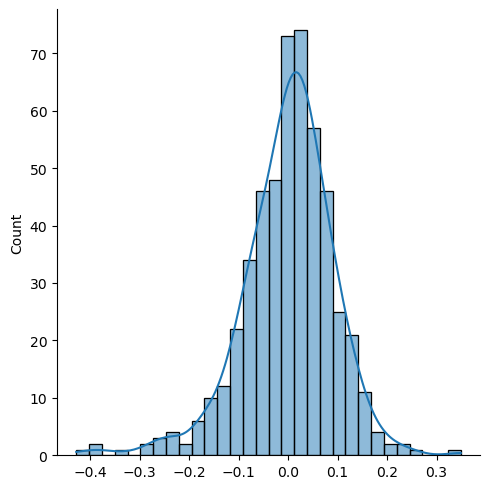

In [46]:
#calculating the error terms
residual = y_train-y_train_predicted
sns.displot(residual, kde=True)

<font color='blue'>Assumption 1: Validated - The error terms are normally distributed</font>

2. Homoscedasticity check (There should be no visible pattern in residual values.)

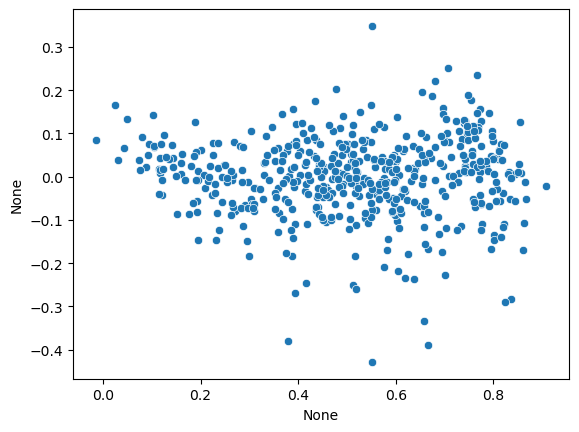

In [47]:
sns.scatterplot(x=y_train_predicted,y=(y_train - y_train_predicted))
plt.show()

<font color='blue'>Assumption 2: There is no visible pattern in residual values.</font>

## 5.6 Evaluate the model with test data

### 5.6.1 Scale the test data

In [48]:
bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])

In [49]:
print(bike_data_test.describe())

               yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    2-summer      3-fall  ...      11-nov  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.264840    0.246575  ...    0.073059   
std      0.159947    0.218435    0.442259    0.4

### 5.6.2 Define X and y

In [50]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

### 5.6.3 - Drop the features (Deleted before for train data LM)

In [51]:
X_train_final.columns

Index(['const', 'yr', 'temp', 'windspeed', '2-summer', '4-winter', '2-misty',
       '3-snow', '10-oct', '8-aug', '9-sep'],
      dtype='object')

In [52]:
#drop features
columns_to_keep = X_train_final.columns[X_train_final.columns != 'const']
X_test = X_test[columns_to_keep]


In [53]:
X_test.head()

,yr,temp,windspeed,2-summer,4-winter,2-misty,3-snow,10-oct,8-aug,9-sep
184,0,0.831783,0.084219,0,0,1,0,0,0,0
535,1,0.901354,0.153728,1,0,0,0,0,0,0
299,0,0.511964,0.334206,0,1,1,0,1,0,0
221,0,0.881625,0.339570,0,0,0,0,0,1,0
152,0,0.817246,0.537414,1,0,0,0,0,0,0


### 5.6.4 Building the model using test data

In [54]:
lm = build_model_and_check(X_test, y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     90.63
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           3.67e-70
Time:                        11:21:41   Log-Likelihood:                 206.70
No. Observations:                 219   AIC:                            -391.4
Df Residuals:                     208   BIC:                            -354.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0802      0.027      2.922      0.004       0.026       0.134
yr             0.2357      0.013     17.610      0.000       0.209       0.262
temp           0.5353      0.033     16.177      0.000       0.470       0.600
windspeed     -0.0358      0.044     -0.819      0.414      -0.122       0.050
2-summer       0.0918      0.017      5.359      0.000       0.058       0.126
4-winter       0.1186      0.020      5.801      0.000       0.078       0.159
2-misty       -0.0774      0.014     -5.360      0.000      -0.106      -0.049
3-snow        -0.2262      0.042     -5.407      0.000      -0.309      -0.144
10-oct         0.1026      0.030      3.471      0.001       0.044       0.161
8-aug          0.0316      0.031      1.014      0.312      -0.030       0.093
9-sep          0.0941      0.026      3.689      0.000       0.044       0.144
==============================================================================
Omnibus:                       15.741   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.299
Skew:                          -0.607   Prob(JB):                     0.000175
Kurtosis:                       3.651   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
1,temp,4.83
2,windspeed,3.41
4,4-winter,1.92
0,yr,1.85
3,2-summer,1.82
7,10-oct,1.66
5,2-misty,1.46
8,8-aug,1.35
9,9-sep,1.31
6,3-snow,1.12


### 5.6.5 Predicting

In [55]:
X_test_sm = sm.add_constant(X_test)
y_test_predicted = lm.predict(X_test_sm)

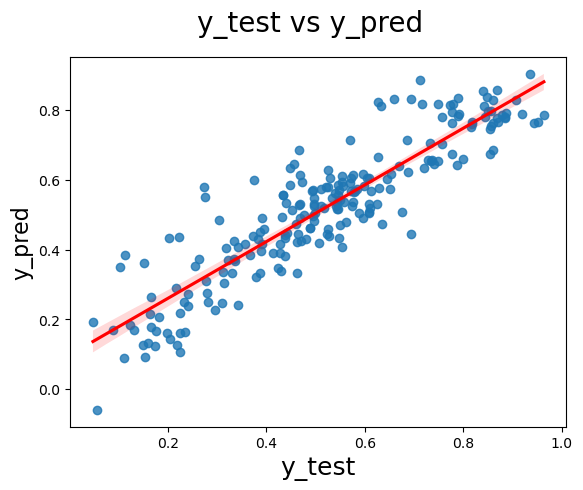

In [56]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_predicted, fit_reg=True, line_kws={'color': 'red'})
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

### 5.6.6 - Comparison - Train vs Test model

In [57]:
from sklearn.metrics import r2_score, mean_squared_error

R2 Score

In [58]:
print('R2 for train data: ',r2_score(y_train, y_train_predicted))
print('R2 for test data: ',r2_score(y_test, y_test_predicted))

R2 for train data:  0.831112629579089
R2 for test data:  0.8133324809928756


MSS

In [59]:
# checking the mean squared error for both training and testing dataset.
print('MSS for train data: ',mean_squared_error(y_true=y_train,y_pred=y_train_predicted))
print('MSS for test data: ',mean_squared_error(y_true=y_test,y_pred=y_test_predicted))

MSS for train data:  0.008502283914069833
MSS for test data:  0.008865924670651755


# 6 - Conclusion

Features

In [60]:
lr_model_final.params

const        0.130983
yr           0.233089
temp         0.512421
windspeed   -0.153827
2-summer     0.103252
4-winter     0.125201
2-misty     -0.081842
3-snow      -0.284333
10-oct       0.035694
8-aug        0.058868
9-sep        0.118525
dtype: float64

Equation:

0.131 + 0.234 * yr + 0.512 * temp - 0.154 * windspeed + 0.103 * summar + 0.125 * winter - 0.082 * misty - 0.284 * snow + 0.035 * Oct + 0.059 * Aug + 0.119 * Sep

- <font color='blue'>All the positive coefficients- temp, year, summer, winter, Months (October, August, Sept) indicate that an increase in these values will lead to an increase in the value of cnt.</font>
- <font color='blue'>All the negative coefficients (windspeed, misty, snow) indicate that an increase in these values will lead to a decrease in the value of cnt.</font>
- <font color='blue'>R-Sqaured and Adj R-Sqaured value of both train and test dataset are around 81%, means these variables can explain 81% of bike demand.</font>
- <font color='blue'>We can concluded that the variables temperature , season, weather and month are significant in predicting the demand for shared bikes .</font>
- <font color='blue'> Least demand during Holidays or weekends. </font>
- <font color = 'blue'>Other observations: Bike demand is more</font>
    - <font color="blue">If temperature is between 10 and 30</font>
    - <font color="blue">If humidity is between 50 and 80</font>
    - <font color="blue">More people tend to use bikes when the weather is ‘clear’.
</font>